In [10]:
from fasp.search import DataConnectClient
cl = DataConnectClient('http://localhost:8089/', passport='~/.keys/passport-enc.txt')

In [11]:
cl.list_table_info('bigquery.gecco_crc_susceptibility.subject_phenotypes', verbose=True)

_Schema for tablebigquery.gecco_crc_susceptibility.subject_phenotypes_
{
   "name": "bigquery.gecco_crc_susceptibility.subject_phenotypes",
   "data_model": {
      "description": "",
      "$id": "dbgap:pht007609.v1",
      "properties": {
         "STUDY": {
            "$id": "dbgap:phv00357188.v1",
            "description": "Study acronym",
            "type": "string",
            "oneOf": [
               {
                  "title": "CPS-II"
               },
               {
                  "title": "DACHS"
               },
               {
                  "title": "HPFS"
               },
               {
                  "title": "NHS"
               },
               {
                  "title": "PLCO"
               },
               {
                  "title": "WHI"
               }
            ]
         },
         "SUBJECT_ID": {
            "$id": "dbgap:phv00357182.v1",
            "description": "De-identified subject ID",
            "type": "string"
       

In [13]:
df = cl.run_query('select * from bigquery.gecco_crc_susceptibility.subject_phenotypes_gru', return_type='dataframe')

Retrieving the query
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________


In [14]:
df

,dbgap_subject_id,subject_id,affection_status,sex,age,race,ethnicity,study
0,2473351,72196,Control,Male,48,White,Unknown,HPFS
1,2473352,72197,Case,Male,48,White,Unknown,HPFS
2,2473365,72210,Case,Male,48,White,Unknown,HPFS
3,2473402,72249,Case,Male,48,White,Unknown,HPFS
4,2473391,72238,Case,Male,49,White,Unknown,HPFS
...,...,...,...,...,...,...,...,...
612,2474331,95384,Case,Female,79,White,Unknown,CPS-II
613,2474344,95398,Case,Female,79,White,Unknown,CPS-II
614,2474166,95177,Control,Female,80,White,Unknown,CPS-II
615,2474255,95294,Case,Female,80,White,Unknown,CPS-II


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(12,2), 'figure.dpi':100})

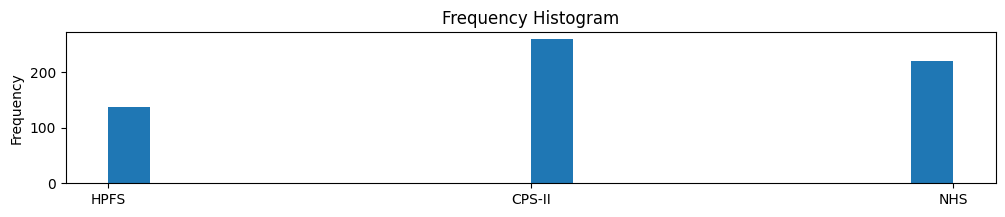

In [16]:
plt.hist(df['study'], bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [18]:
df2 = cl.run_query('select * from bigquery.gecco_crc_susceptibility.subject_multi', return_type='dataframe')

Retrieving the query
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________


In [19]:
df2

,dbgap_subject_id,subject_id,consent,subject_source,source_subject_id
0,402445,63331,2,WHI,861065
1,402651,64033,2,WHI,789072
2,415857,63738,2,WHI,731788
3,403352,63730,2,WHI,816326
4,398405,63731,2,WHI,791287
...,...,...,...,...,...
2887,2474006,78707,5,None,None
2888,2474001,78701,5,None,None
2889,2474000,78700,5,None,None
2890,2474003,78703,5,None,None


In [21]:
cl.list_table_info('bigquery.gecco_crc_susceptibility.subject_multi', verbose=True)

_Schema for tablebigquery.gecco_crc_susceptibility.subject_multi_
{
   "name": "bigquery.gecco_crc_susceptibility.subject_multi",
   "data_model": {
      "description": "",
      "$id": "dbgap:pht007607.v1",
      "properties": {
         "SUBJECT_SOURCE": {
            "$id": "dbgap:phv00357175.v1",
            "description": "Source repository where subjects originate",
            "type": "string"
         },
         "SUBJECT_ID": {
            "$id": "dbgap:phv00357173.v1",
            "description": "Subject ID",
            "type": "string"
         },
         "CONSENT": {
            "$id": "dbgap:phv00357174.v1",
            "description": "Consent group as determined by DAC",
            "type": "encoded value",
            "oneOf": [
               {
                  "const": "1",
                  "title": "General Research Use (GRU)"
               },
               {
                  "const": "2",
                  "title": "Health/Medical/Biomedical (IRB) (HMB-IRB)"


In [25]:
df3 = cl.run_query('''select p.*, s.consent , s.subject_source 
                  from bigquery.gecco_crc_susceptibility.subject_phenotypes_gru p
                  join bigquery.gecco_crc_susceptibility.subject_multi s
                  on s.subject_id = p.subject_id''',
                  return_type='dataframe')

Retrieving the query
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________
____Page11_______________


In [26]:
df3

,dbgap_subject_id,subject_id,affection_status,sex,age,race,ethnicity,study,consent,subject_source
0,2473351,72196,Control,Male,48,White,Unknown,HPFS,1,None
1,2473352,72197,Case,Male,48,White,Unknown,HPFS,1,None
2,2473365,72210,Case,Male,48,White,Unknown,HPFS,1,None
3,2473402,72249,Case,Male,48,White,Unknown,HPFS,1,None
4,2473391,72238,Case,Male,49,White,Unknown,HPFS,1,None
...,...,...,...,...,...,...,...,...,...,...
612,2474331,95384,Case,Female,79,White,Unknown,CPS-II,1,None
613,2474344,95398,Case,Female,79,White,Unknown,CPS-II,1,None
614,2474166,95177,Control,Female,80,White,Unknown,CPS-II,1,None
615,2474255,95294,Case,Female,80,White,Unknown,CPS-II,1,None


0 AxesSubplot(0.125,0.536818;0.775x0.343182) Control
1 AxesSubplot(0.125,0.125;0.775x0.343182) Case


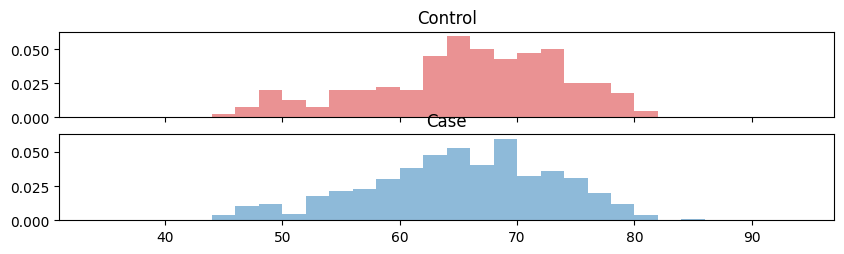

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green']
mybins = list(range(34, 96, 2))
for i, (ax, affection_status) in enumerate(zip(axes.flatten(), df3.affection_status.unique())):
    x = df3.loc[df3.affection_status==affection_status, 'age']
    print(i, ax, affection_status)
    ax.hist(x, alpha=0.5, bins=mybins, density=True, stacked=True, label=str(affection_status), color=colors[i])
    ax.set_title(affection_status)

In [28]:

mybins

[34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94]

In [29]:
for a in mybins:
    print(a)

34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94


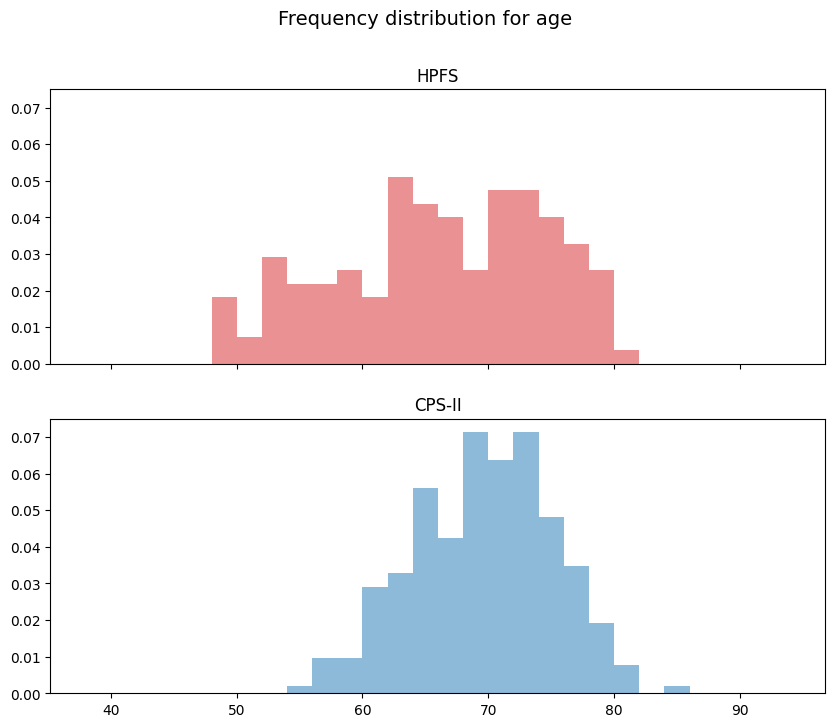

In [30]:
myvar = df3.study
datacol = 'age'
fig, axes = plt.subplots(2, 1, figsize=(10,8), dpi=100, sharex=True, sharey=True)
fig = plt.gcf()
fig.suptitle(f'Frequency distribution for {datacol}', fontsize=14)
#plt.gca().set(title=, ylabel='Frequency')
colors = ['tab:red', 'tab:blue', 'tab:green']
mybins = list(range(38, 96, 2))
for i, (ax, var_status) in enumerate(zip(axes.flatten(), myvar.unique())):
    x = df3.loc[myvar==var_status, datacol]
    ax.hist(x, alpha=0.5, bins=mybins, density=True, stacked=True, label=str(var_status), color=colors[i])
    ax.set_title(var_status)